# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from pickle import dump
from lime.lime_tabular import LimeTabularExplainer

# Loading Dataset

In [3]:
dataset = pd.read_csv('data/data.csv')

# Dataset description

In [4]:
dataset.describe()

,OXYL,HR,SLEEP,AP,SI,SL
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,92.634615,81.365385,6.826923,0.384615,0.423077,2.115385
std,8.569598,13.456913,1.361341,0.488860,0.496440,0.612296
min,60.000000,60.000000,4.000000,0.000000,0.000000,1.000000
25%,90.000000,74.500000,6.000000,0.000000,0.000000,2.000000
50%,97.000000,78.000000,7.000000,0.000000,0.000000,2.000000
75%,98.000000,83.000000,8.000000,1.000000,1.000000,2.250000
max,101.000000,130.000000,10.000000,1.000000,1.000000,3.000000


# Data Framing

In [5]:
dataframe = pd.DataFrame(dataset, columns = ['OXYL', 'HR', 'SLEEP', 'AP', 'SI'])
dataframe.head()

,OXYL,HR,SLEEP,AP,SI
0,99,85,7,1,0
1,98,75,8,0,0
2,90,80,6,0,1
3,99,83,7,0,0
4,90,121,10,1,0


In [6]:
dataframe['SL'] = dataset.SL
dataframe.head()

,OXYL,HR,SLEEP,AP,SI,SL
0,99,85,7,1,0,2
1,98,75,8,0,0,2
2,90,80,6,0,1,2
3,99,83,7,0,0,2
4,90,121,10,1,0,2


# Correlation and Heatmap

In [7]:
correlation = dataframe.corr()

<Axes: >

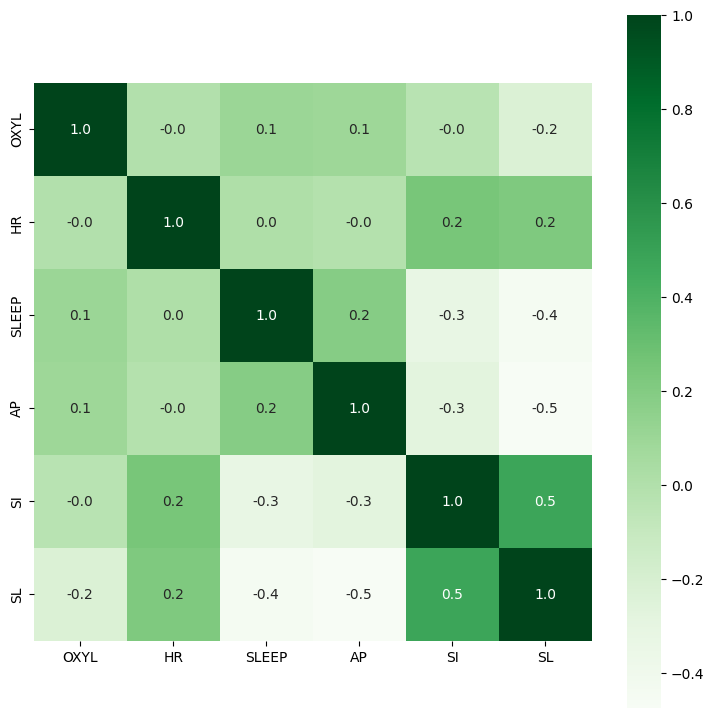

In [8]:
plt.figure(figsize=(9, 9))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# Splitting Attributes and Stress Level

In [9]:
X = dataframe.drop(['SL'], axis=1)
Y = dataframe['SL']

In [10]:
print(X)
print(Y)

     OXYL   HR  SLEEP  AP  SI
0      99   85      7   1   0
1      98   75      8   0   0
2      90   80      6   0   1
3      99   83      7   0   0
4      90  121     10   1   0
..    ...  ...    ...  ..  ..
99     83   93      5   0   1
100    85   75      5   0   0
101    70   73      5   0   1
102    79   80      9   0   0
103    90   80      5   0   1

[104 rows x 5 columns]
0      2
1      2
2      2
3      2
4      2
      ..
99     3
100    3
101    3
102    2
103    3
Name: SL, Length: 104, dtype: int64


# Splitting Data into Training and Testing Modules

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(104, 5) (83, 5) (21, 5)


# Training the Model - Multiple Regression

In [12]:
model = linear_model.LinearRegression()
model.fit(X_train.values, Y_train.values)


LinearRegression()

# Saving the model

In [14]:
dump(model, open('trained-model/mymodel.pkl','wb')) 

# Prediction and Evaluation

In [15]:
# On training data
training_predection = model.predict(X_train.values)
print(training_predection)

[2.06186673 1.85584418 2.21482453 2.36336063 2.58543985 2.251903
 2.92698528 1.53810083 2.96543905 2.251903   1.88144199 2.04664142
 2.48199252 1.85584418 2.59611927 1.57715776 2.03898    1.57440939
 2.674391   2.74671485 2.17324929 1.69731457 2.58543985 2.33276753
 2.6412831  2.91706981 1.4627241  1.57440939 2.33276753 1.88879949
 1.93827685 2.21482453 1.88144199 2.48199252 3.22001655 2.07613353
 1.69731457 2.17324929 1.94842468 1.98298244 2.21482453 1.6022583
 1.41695064 1.45196664 1.94842468 1.61370166 1.38468003 1.86061475
 1.4627241  1.98298244 1.63697037 2.3793842  2.17435027 2.04664142
 1.97912543 1.91321711 3.22001655 2.35565426 1.57715776 1.7292032
 1.86061475 2.74671485 1.38468003 1.53810083 1.88967995 2.6412831
 2.17435027 1.89162413 1.94148226 2.06186673 2.91706981 1.7292032
 1.6022583  2.92698528 1.61370166 1.93827685 2.10275727 2.15036136
 2.674391   1.41695064 1.89162413 1.88967995 2.35565426]


In [16]:
# R Squared Error
errorR = metrics.r2_score(Y_train,training_predection)
accuracyR = 100-((errorR/11)*100)

# Mean Absolute Error
errorM = metrics.mean_absolute_error(Y_train,training_predection)
accuracyM = 100-((errorM/11)*100)

In [17]:
# On testing data
testing_predection = model.predict(X_test.values)
print(testing_predection)

[2.68988    2.15036136 1.45196664 2.96543905 1.91321711 2.10275727
 2.59611927 2.21482453 2.7520578  1.88879949 1.94148226 1.97859086
 2.7520578  2.3793842  1.63697037 2.36336063 2.07613353 2.68988
 1.97912543 1.97859086 2.03898   ]


In [18]:
# R Squared Error
errorR_test = metrics.r2_score(Y_test,testing_predection)
accuracyR_test = 100-((errorR_test/11)*100)

# Mean Absolute Error
errorM_test = metrics.mean_absolute_error(Y_test,testing_predection)
accuracyM_test = 100-((errorM_test/11)*100)

In [19]:
scores = {
    'Training':{
        'R squared Error':accuracyR,
        'Mean absolute error':accuracyM
    },
    'Testing':{
        'R squared Error':accuracyR_test,
        'Mean absolute error':accuracyM_test
    }
}
scores_df = pd.DataFrame(scores)
print('Accuracy levels in percentage\n')
print(scores_df)

Accuracy levels in percentage

                     Training    Testing
R squared Error      95.51062  98.293461
Mean absolute error  96.68475  97.442852


# Implementing XAI

In [20]:
# Instantiating the explainer object by passing in the training set, and the extracted features
explainer = LimeTabularExplainer(training_data=X_train.values, mode = 'regression', feature_names=X_train.columns)




# Calling the explain_instance method by passing in the:
#    1) ith test vector
#    2) prediction function used by our prediction model('model' in this case)
i=3
explaining_obs = explainer.explain_instance(X_train.iloc[i], model.predict)




# Finally visualizing the explanations
explaining_obs.show_in_notebook()